# 신뢰구간
- 표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나
- 모수(모집단의 특성)에 대한 추정값의 범위를 제공하여 추정의 볼확실성을 나타냄
- 신뢰구간은 주어진 신뢰수준(일반적으로는 95% 또는 99% 등)에 따라 모수가 존재할 것으로 예상되는 범위를 나타냄 예) 95% 신뢰구간은 모수가 95% 확률로 해당 구간에 속할 것으로 추정
- 신뢰구간은 일반적으로 표본 크기, 추정 방법, 데이터의 변동성 등과 같은 요소에 따라 달라질 수 있으며 정확한 신뢰구간을 구하기 위해서는 통계학적인 가정과 계산 방법을 사용해야 함

## 파이썬으로 신뢰구간 구하기
`scipy.stats` 패키지의 `t`객체가 포함하는 `interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차)` 메서드 사용
##### 파라미터
- 신뢰도: `95%`, `90%` 등을 `0~1` 범위 안에서 설정
- 자유도: 통계 모델의 매개변수나 관측치들이 얼마나 자유롭게 변할 수 있는지를 나타내는 값; 일반적으로 `전체데이터수 - 1`
- 샘플평균: 데이터들의 평균값
- 샘플표준오차: 데이터들의 표준오차 -> ${표준편차 \over \sqrt{샘플크기}}$

## 1. 작업준비
### 1) 패키지 참조

In [1]:
import sys
import seaborn as sb
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt

### 2) 데이터 가져오기

In [2]:
df = read_excel('https://data.hossam.kr/E02/insur.xlsx')
df

,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150
5,2,2,1,48,2.5,200
6,3,3,2,50,9.0,90
7,3,3,1,53,7.5,180
8,2,2,1,49,5.5,250
9,3,4,1,55,25.0,300


## 2. 신뢰구간 구하기
##### 신뢰수준

In [3]:
clevel = 0.95

##### 샘플 사이즈

In [4]:
n = len(df['가입금액'])

##### 자유도 (Degree of Freedom)
- 총관측치 - 1

In [5]:
dof = n - 1
dof

29

##### 표본 평균
- 평균이랑 같은 의미

In [6]:
sample_mean = df['가입금액'].mean()
sample_mean

11.783333333333333

##### 표본 표준 편차
- 파이썬에서는 표준편차를 계산할 때, 옵션으로 `ddof`라는 것을 사용
- 위의 코드에서 `ddof = 1`은 표준편차를 계산할 때 `n-1`로 나누라는 의미

In [7]:
sample_std = df['가입금액'].std(ddof = 1)
sample_std

8.131678510756489

##### 표본 표준 오차
- ${표준편차 \over \sqrt{샘플크기}}$

In [8]:
from math import sqrt
sample_std_error = sample_std / sqrt (n)
# sample_std_error = sample_std / n**0.5 와 같음
sample_std_error

1.4846345835737815

##### 신뢰구간

In [9]:
cmin, cmax = t.interval(clevel, dof, loc = sample_mean, scale = sample_std_error)
cmin, cmax

(8.746914675272894, 14.819751991393773)

## 3. 시각화

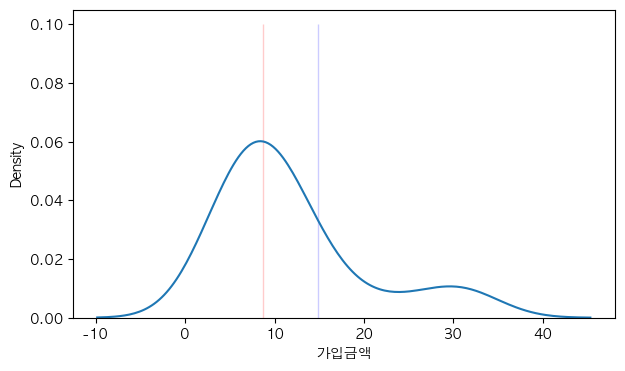

In [11]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

sb.kdeplot(data = df, x = '가입금액')
sb.lineplot(x = [cmin, cmin], y = [0, 0.1], color = 'red')
sb.lineplot(x = [cmax, cmax], y = [0, 0.1], color = 'blue')
plt.show()
plt.close()
